In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
def generate_powers(min_time, max_time, interval):
    times = []
    current_time = min_time
    while current_time <= max_time:
        times.append(math.ceil(current_time))
        current_time += interval
    return times

def find_closest(target, lst):
    lst_below_target = [x for x in lst if x <= target]
    return max(lst_below_target)

In [9]:
# dfMaxN = pd.read_csv("merged_observed_predicted_resnet_new.csv")
# maxN = dfMaxN[dfMaxN['powermode'] == '12_2201600_1300500000_3199000000']
# maxN
# # df1 = pd.read_csv("yolo_50_pareto.csv") #Analytical 
# df1 = pd.read_csv("resnet_resnet_TL_curvefit_pareto_powermodes_pred_new.csv")
# df2 = pd.read_csv("pareto_powermodes_obs_resnet.csv") #TL Prediction
# data = pd.read_csv("pareto_errors_resnet.csv") #TL Prediction Errors
# df_ran1 = pd.read_csv("resnet_50_pareto1.csv") #Random
# df_nn = pd.read_csv("resnet_pareto_powermodes_pred_new.csv") #NN Prediction


dfMaxN = pd.read_csv("merged_observed_predicted_mobnet_new.csv")
maxN = dfMaxN[dfMaxN['powermode'] == '12_2201600_1300500000_3199000000']
maxN
# df1 = pd.read_csv("yolo_50_pareto.csv") #Analytical 
df1 = pd.read_csv("mobnet_resnet_TL_curvefit_pareto_powermodes_pred_new.csv")
df2 = pd.read_csv("pareto_powermodes_obs_mobnet.csv") #TL Prediction
data = pd.read_csv("pareto_errors_mobnet.csv") #TL Prediction Errors
df_ran1 = pd.read_csv("mobnet_50_pareto1.csv") #Random
df_nn = pd.read_csv("mobnet_pareto_powermodes_pred_new.csv") #NN Prediction

In [10]:
maxNTime = maxN['observed_time'].values[0]
maxNPower = maxN['observed_power'].values[0]
maxNTime = maxNTime/1000
maxNTime

139.32630998229982

In [11]:
df2 = df2[["powermode","observed_time","observed_power"]]

In [12]:
min_power = math.ceil(min(df1["observed_power"])) #14
max_power = math.floor(max(df1["observed_power"])) #43

In [13]:
max_power

18

In [14]:
min_power

15

In [15]:
power_int_lst = generate_powers(17,50,1)
#resnet 17:50 (offset = 2)
#mobnet 16:50 (offset = 1)
#yolo 15:50 (offset = 0)



In [16]:
len(power_int_lst)

34

In [17]:
t1 = [] # p1-t
t1_per = [] # (p1-t)/t
t11 = [] # p11-p1
t11_per =[] # (p11-p1)/p1

p_anal = [] # p11-t 
p_anal_per = [] # (p11-t)/t
t_anal = []
t_anal_per = []

# t_anal = [] # pred_time - gnd_time
# t_tl_per = [] # (pred_time - gnd_time)/gnd_time

p_ran1 = []
p_ran_per1 = []
t_ran1 = []
t_ran_per1 = []


p_maxn = []
p_maxn_per = []
t_maxn = []
t_maxn_per = []

p_nn = []
p_nn_per = []
t_nn = []
t_nn_per = []


# obs_pwd_lst = []
for i in power_int_lst:
    closest_obs = find_closest(i,df2['observed_power'])
    
#     print(closest_obs)
    obs_pwd = df2[df2['observed_power'] == closest_obs]['powermode'].values[0]
    closest_obs_time = df2[df2['observed_power'] == closest_obs]['observed_time'].values[0]

    t1.append(closest_obs-i)
    t1_per.append((closest_obs-i)/i*100)
    
    closest_pred = find_closest(i,df1['observed_power'])
    obs_pwd = df1[df1['observed_power'] == closest_pred]['powermode'].values[0]
    p_anal.append((closest_pred-i))
    p_anal_per.append((closest_pred-i)/i*100)
    t11.append(closest_pred-closest_obs)
    t11_per.append((closest_pred-closest_obs)/closest_obs*100)
    pred_time = df1[df1['observed_power'] == closest_pred]['observed_time'].values[0]
    t_anal.append(pred_time-closest_obs_time)
    t_anal_per.append((pred_time-closest_obs_time)/closest_obs_time*100)

    closest_pred = find_closest(i,df_ran1['observed_power'])
    obs_pwd = df_ran1[df_ran1['observed_power'] == closest_pred]['powermode'].values[0]

    p_ran1.append(closest_pred-i)
    p_ran_per1.append((closest_pred-i)/i*100)
    pred_time = df_ran1[df_ran1['observed_power'] == closest_pred]['observed_time'].values[0]
    t_ran1.append(pred_time-closest_obs_time)
    t_ran_per1.append((pred_time-closest_obs_time)/closest_obs_time*100)

    p_maxn.append(maxNPower-i)
    p_maxn_per.append((maxNPower-i)/i*100)
    t_maxn.append(maxNTime-closest_obs_time)
    t_maxn_per.append((maxNTime-closest_obs_time)/closest_obs_time*100)

    closest_pred = find_closest(i,df_nn['predicted_power'])
    obs_pwd = df_nn[df_nn['predicted_power'] == closest_pred]['powermode'].values[0]
    closest_obs = df_nn[df_nn['powermode']==obs_pwd]['observed_power'].values[0]
    p_nn.append((closest_obs-i))
    p_nn_per.append((closest_obs-i)/i*100)
    # t11.append(closest_pred-closest_obs)
    # t11_per.append((closest_pred-closest_obs)/closest_obs*100)
    pred_time = df_nn[df_nn['predicted_power'] == closest_pred]['observed_time'].values[0]
    t_nn.append(pred_time-closest_obs_time)
    t_nn_per.append((pred_time-closest_obs_time)/closest_obs_time*100)


In [18]:
def plot_errors_time(data):
    plt.rc('xtick', labelsize='xx-large')
    plt.rc('ytick', labelsize='xx-large')
    plt.rc('axes', labelsize='xx-large', titlesize='xx-large')
    plt.rcParams['legend.title_fontsize'] = 'xx-large'
    plt.rcParams['legend.fontsize'] = 'xx-large'


    # Define the figure and axes
    fig, ax1 = plt.subplots(figsize=(12, 5))
    # Multiple every element with -1
    data_neg = [1 * x for x in data['Error4']]
    t_ran_per1_neg = [1 * x for x in t_ran_per1]
    t_anal_per_neg = [1 * x for x in t_anal_per]
    t_maxn_per_neg = [1 * x for x in t_maxn_per]
    t_nn_per_neg = [1 * x for x in t_nn_per]
    # t_tl_per_neg = [1 * x for x in t_tl_per]
    # Plot error1, error2, error3 on the left y-axis
    ax1.plot(power_int_lst, t_ran_per1_neg, color='#c7e59b', label='RND', linestyle='-', linewidth=3)
    ax1.plot(power_int_lst, t_anal_per_neg, color='#fb9a3c', label='ANL', linestyle='-', linewidth=3)
    ax1.plot(power_int_lst, t_maxn_per_neg, color='#be4986', label='MAX', linestyle='-', linewidth=3)
    ax1.plot(power_int_lst, t_nn_per_neg, color='#fadc6f', label='NN', linestyle='-', linewidth=3)
    ax1.plot(data['Power_target'][2:], data_neg[2:], color='#e36668', label='PT', linestyle='-', linewidth=3)
    # ax1.plot(power_int_lst, data_neg, color='#e36668', label='TL', linestyle='-', linewidth=2)    





    ax1.axhline(0, color='black', linewidth=3)  # Add a bold zero line


    ax1.set_xlabel('Specified Power Limit (W)', fontsize=30)
    ax1.set_ylabel('Time Penalty (%)', color='black', fontsize=30)
    # ax1.set_title('Errors and Power Differences vs. Power Target')
    ax1.set_ylim([-50, 50])
    # Set y-ticks at every integer value within the y-axis range
    ax1.set_yticks(range(-50,170,50))
    ax1.set_xticks(range(10,55,5)) # This line is added to set y-ticks
    ax1.set_xlim(10,50)
    ax1.tick_params(axis='both', which='major', labelsize=24)
    # ax1.legend(loc='upper left')
    ax1.legend(loc='upper right', ncol=3, fontsize=20)
    ax1.spines['left'].set_color('black')
    ax1.spines['left'].set_linewidth(1.5)
    plt.minorticks_on()
    ax1.yaxis.grid(which = 'minor', linestyle = '-', linewidth = 0.25, color = 'lightgrey')

    ax1.xaxis.grid(which = 'minor', linestyle = '-', linewidth = 0.25, color = 'lightgrey')


    ax1.yaxis.grid(which='major', linestyle='-', linewidth = 0.5, color='darkgrey')
    ax1.xaxis.grid(which='major', linestyle='-', linewidth = 0.5, color='darkgrey')
    plt.tight_layout()
    plt.savefig("mobnet_time_penalty_line.pdf", bbox_inches='tight',format='pdf',dpi=300)

    ax1.set_axisbelow(True)

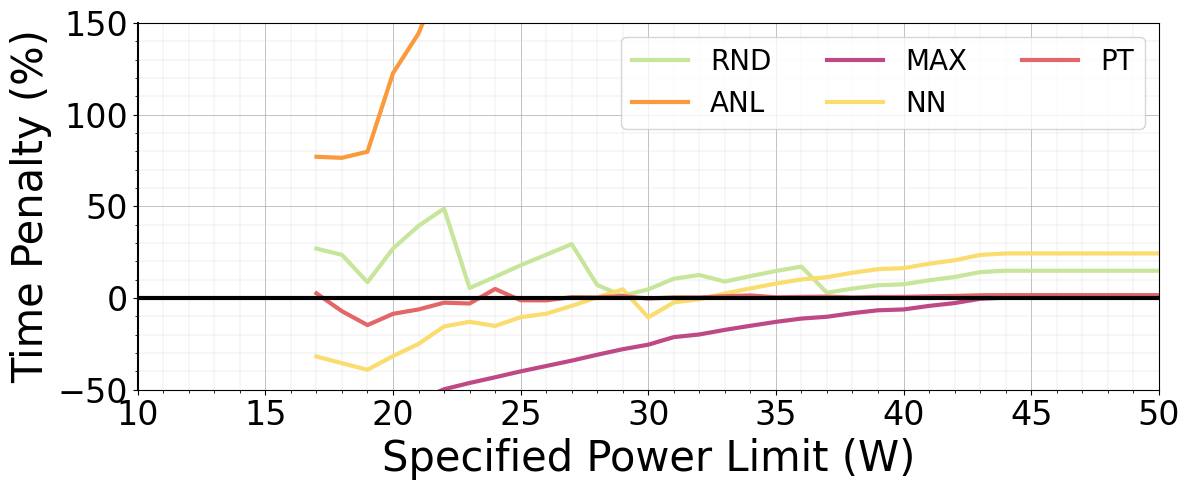

In [19]:
plot_errors_time(data)

In [20]:
def plot_errors_power(data):
    plt.rc('xtick', labelsize='xx-large')
    plt.rc('ytick', labelsize='xx-large')
    plt.rc('axes', labelsize='xx-large', titlesize='xx-large')
    plt.rcParams['legend.title_fontsize'] = 'xx-large'
    plt.rcParams['legend.fontsize'] = 'xx-large'

    # data = pd.read_csv("pareto_errors_mobnet.csv")
    # data = pd.read_csv("pareto_errors_resnet.csv")
    # data = pd.read_csv("pareto_errors_yolo.csv")
    # Define the figure and axes
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Plot error1, error2, error3 on the left y-axis
    ax1.plot(power_int_lst, p_anal_per, color='#fb9a3c', label='ANL', linestyle='-', linewidth=3)
    ax1.plot(power_int_lst, p_maxn_per, color='#be4986', label='MAX', linestyle='-', linewidth=3)
    ax1.plot(power_int_lst, p_nn_per, color='#fadc6f', label='NN', linestyle='-', linewidth=3)
    ax1.plot(data['Power_target'][2:], data["Error2"][2:], color='#e36668', label='PT', linestyle='-', linewidth=3)
    # ax1.plot(power_int_lst, p_tl_per, color='blue', label='TL', linestyle='-', linewidth=2)
#     ax1.plot(power_int_lst, p_ran_per, color='red', label='Random', linestyle='-', linewidth=2)
#     ax1.plot(power_int_lst, p_anal_per, color='yellow', label='Analytical', linestyle='-', linewidth=2)





    ax1.set_xlabel('Specified Power Limit (W)', fontsize=30)
    ax1.set_ylabel('Power Penalty (%)', color='black', fontsize=30)
    # ax1.set_title('Errors and Power Differences vs. Power Target')
    ax1.set_ylim([0, 10])
    # Set y-ticks at every integer value within the y-axis range
    ax1.set_yticks(range(0,50,10))
    ax1.set_xticks(range(10,55,5)) # This line is added to set y-ticks
    ax1.set_xlim(10,50)
    ax1.tick_params(axis='both', which='major', labelsize=24)
    # ax1.legend(loc='upper left')
    # ax1.legend(loc='upper left', ncol=4, fontsize='20')
    
    ax1.spines['left'].set_color('black')
    ax1.spines['left'].set_linewidth(1.5)
    plt.minorticks_on()
    plt.minorticks_on()
    ax1.yaxis.grid(which = 'minor', linestyle = '-', linewidth = 0.25, color = 'lightgrey')

    ax1.xaxis.grid(which = 'minor', linestyle = '-', linewidth = 0.25, color = 'lightgrey')


    ax1.yaxis.grid(which='major', linestyle='-', linewidth = 0.5, color='darkgrey')
    ax1.xaxis.grid(which='major', linestyle='-', linewidth = 0.5, color='darkgrey')
    ax1.set_axisbelow(True)

    plt.tight_layout()
    ax2 = ax1.twinx()


    ax2.plot(data['Power_target'][2:], data["p11-t"][2:], color='#e36668', label='PT', linestyle='--', linewidth=3)
    # ax2.plot(power_int_lst, p_tl, color='blue', label='TL', linestyle='--', linewidth=2)
#     ax2.plot(power_int_lst, p_ran, color='red', label='Random', linestyle='--', linewidth=2)
#     ax2.plot(power_int_lst, p_anal, color='yellow', label='Analytical', linestyle='--', linewidth=2)
    ax2.plot(power_int_lst, p_maxn, color='#be4986', label='MAX', linestyle='--', linewidth=3)
    ax2.plot(power_int_lst, p_nn, color='#fadc6f', label='NN', linestyle='--', linewidth=3)
    ax2.plot(power_int_lst, p_anal, color='#fb9a3c', label='ANL', linestyle='--', linewidth=3)
    ax2.tick_params(axis='both', which='major', labelsize=24)
    ax2.set_ylabel('Abs Power Error (W)', color='black', fontsize=30)
    ax2.set_ylim([0, 5])
#     ax2.legend(loc='upper right')

    ax2.spines['right'].set_color('black')
    ax2.spines['right'].set_linewidth(2)

    custom_legend = [
        plt.Line2D([0], [0], color = 'black', linestyle='-', linewidth=3),
        plt.Line2D([0], [0], color= 'black', linestyle='--', linewidth=3)
    ]

    legend_labels = ['Power Penalty (%)', 'Abs Power Error (W)']

    # Set loc to 'upper right' and add handles and labels
    ax2.legend(handles=custom_legend, labels=legend_labels, loc='upper right', ncol=2, bbox_to_anchor=(1, 1), fontsize='20')
    plt.tight_layout()
    plt.savefig("mobnet_power_penalty_line.pdf", bbox_inches='tight',format='pdf',dpi=300)

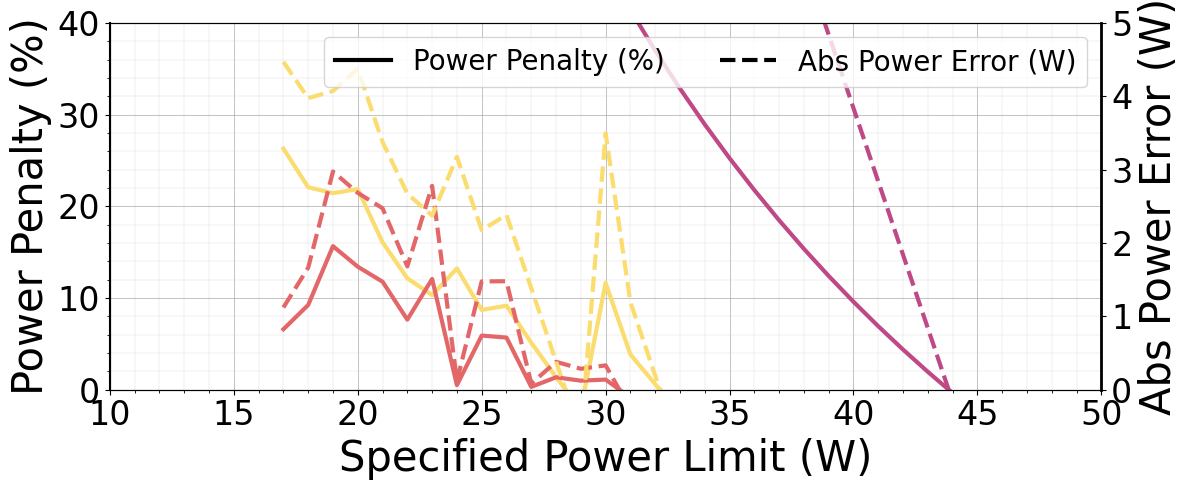

In [21]:
plot_errors_power(data)

In [22]:
max(t_anal_per)

456.0153079434177

In [23]:
# Subtarct every element in power_int_lst with 17
power_int_lst = [x - 17 for x in power_int_lst]


In [24]:
p_nn_series = pd.Series(p_nn, index=power_int_lst)
maxn_series = pd.Series(p_maxn, index=power_int_lst)
anal_series = pd.Series(p_anal, index=power_int_lst)
p_tl_series = data['p11-t'][2:]

In [25]:
# Negative values in the series are made 0
tl_power = [0 if x < 0 else x for x in p_tl_series]
nn_power = [0 if x < 0 else x for x in p_nn_series]
maxn_power = [0 if x < 0 else x for x in maxn_series]
anal_power = [0 if x < 0 else x for x in anal_series]


In [26]:
tl_area = np.trapz(tl_power, power_int_lst)
nn_area = np.trapz(nn_power, power_int_lst)
maxn_area = np.trapz(maxn_power, power_int_lst)
anal_area = np.trapz(anal_power, power_int_lst)

In [27]:
print("TL Area: ", tl_area)
print("NN Area: ", nn_area)
print("MAXN Area: ", maxn_area)
print("Analytical Area: ", anal_area)

TL Area:  18.976750000000003
NN Area:  37.466499999999996
MAXN Area:  360.23349999999994
Analytical Area:  0.0


In [28]:
# % of zero values in the lists
tl_pos = len([x for x in tl_power if x == 0])/len(tl_power)
nn_pos = len([x for x in nn_power if x == 0])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x == 0])/len(maxn_power)
anal_pos = len([x for x in anal_power if x == 0])/len(anal_power)

In [29]:
print("TL %: ", tl_pos)
print("NN %: ", nn_pos)
print("MAXN %: ", maxn_pos)
print("Analytical %: ", anal_pos)

TL %:  0.5882352941176471
NN %:  0.5588235294117647
MAXN %:  0.20588235294117646
Analytical %:  1.0


In [30]:
print("1-TL %: ", 1-tl_pos)
print("1-NN %: ", 1-nn_pos)
print("1-MAXN %: ", 1-maxn_pos)
print("1-Analytical %: ", 1-anal_pos)

1-TL %:  0.4117647058823529
1-NN %:  0.4411764705882353
1-MAXN %:  0.7941176470588236
1-Analytical %:  0.0


In [31]:
# % of values under x in the lists
thres = 1
tl_pos = len([x for x in tl_power if x < thres])/len(tl_power)
nn_pos = len([x for x in nn_power if x < thres])/len(nn_power)
maxn_pos = len([x for x in maxn_power if x < thres])/len(maxn_power)
anal_pos = len([x for x in anal_power if x < thres])/len(anal_power)


In [32]:
print("TL under "+str(thres)+"W %: ", tl_pos)
print("NN under "+str(thres)+"W %: ", nn_pos)
print("MAXN under "+str(thres)+"W %: ", maxn_pos)
print("Analytical under "+str(thres)+"W %: ", anal_pos)

TL under 1W %:  0.7352941176470589
NN under 1W %:  0.6176470588235294
MAXN under 1W %:  0.23529411764705882
Analytical under 1W %:  1.0


In [33]:
print("1-TL under "+str(thres)+"W %: ", 1-tl_pos)
print("1-NN under "+str(thres)+"W %: ", 1-nn_pos)
print("1-MAXN under "+str(thres)+"W %: ", 1-maxn_pos)
print("1-Analytical under "+str(thres)+"W %: ", 1-anal_pos)

1-TL under 1W %:  0.2647058823529411
1-NN under 1W %:  0.38235294117647056
1-MAXN under 1W %:  0.7647058823529411
1-Analytical under 1W %:  0.0


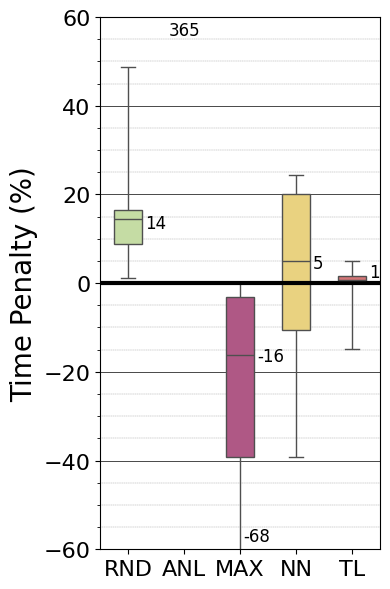

In [37]:
import seaborn as sns


# Create a list of data for each category
datalist = [t_ran_per1,  t_anal_per, t_maxn_per, t_nn_per,  data['Error4']]

# Create a list of labels for each category
labels = ['RND',  'ANL', 'MAX','NN',  'TL']


fig, ax = plt.subplots(figsize=(4, 6))
# Create the box plot with whiskers
colors = ['#c7e59b', '#fb9a3c', '#be4986', '#fadc6f', '#e36668']
sns.boxplot(data=datalist, palette=colors, width=0.5, whis=(0, 100))

# sns.boxplot(data=datalist, color=['purple','red','blue','green','orange'], width=0.5, whis=(0,100))  # Adjust the width and whis parameters here

ax.set_xticks((0,1,2,3,4))
ax.set_xticklabels(labels)
# ax.set_xticks([],[])
ax.set_ylabel('Time Penalty (%)', fontsize=20)
# ax.set_title('Time Penalty (%)', fontszie=16)

# Set the labels for the x-axis
# plt.xticks(range(len(labels)), labels, fontsize=16)

# ax.minorticks_on()  # Add subgrid lines
# ax.grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')  # Add subgrid lines
# ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray')  # Add major gridlines
# add horizontal major and mior gridlines

ax.axhline(0, color='black', linewidth=3)  # Add a bold zero line

ax.set_ylim(-60, 60)  # Clip the y-axis to 100
# Increase font size of tick labels
ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='both', which='major', labelsize=16)



ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=1)
ax.yaxis.grid(which='minor', linestyle='--', linewidth='0.25', color='gray')
ax.minorticks_on()

# Resnet markers

# rand_value = 61
# ax.text(labels.index('RND')+0.25, +57, f'{rand_value}', ha='center', va='center', fontsize=12)
# anal_value = -64
# ax.text(labels.index('ANL')+0.3, -57, f'{anal_value}', ha='center', va='center', fontsize=12)

# Mobnet markers
max_value = -68
ax.text(labels.index('MAX')+0.3, -57, f'{max_value}', ha='center', va='center', fontsize=12)

# Add text marker for the median of each box plot

medians = [int(round(np.median(x))) for x in datalist]

#mobnet
anl_median = medians[1]
medians[1] = ""
ax.text(labels.index('ANL'), 57, f'{anl_median}', ha='center', va='center', fontsize=12, color='black')
median_postions = [int(round(np.median(x))) for x in datalist]

median_postions = [54 if x > 54 else x for x in median_postions]

median_postions[4] = 3

for label, median_value, median_position in zip(labels, medians, median_postions):
    ax.text(labels.index(label)+0.3, median_position, f'{median_value}', ha='left', va='center_baseline', fontsize=12, color='black')


plt.tight_layout()

plt.savefig('timePenalty_Mobnet.pdf', dpi=300, format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
# import seaborn as sns


# # Create a list of data for each category
# datalist = [t_ran_per1,  t_anal_per, t_maxn_per, t_nn_per,  data['Error4']]

# # Create a list of labels for each category
# labels = ['RND',  'ANL', 'MAX','NN',  'TL*']


# fig, ax = plt.subplots(figsize=(4, 6))
# # Create the box plot with whiskers
# colors = ['#c7e59b', '#fb9a3c', '#be4986', '#fadc6f', '#e36668']
# sns.boxplot(data=datalist, palette=colors, width=0.5, whis=(0, 100))

# # sns.boxplot(data=datalist, color=['purple','red','blue','green','orange'], width=0.5, whis=(0,100))  # Adjust the width and whis parameters here

# ax.set_xticks((0,1,2,3,4))
# ax.set_xticklabels(labels)
# # ax.set_xticks([],[])
# ax.set_ylabel('Time Penalty (%)', fontsize=20)
# # ax.set_title('Time Penalty (%)', fontszie=16)

# # Set the labels for the x-axis
# # plt.xticks(range(len(labels)), labels, fontsize=16)

# # ax.minorticks_on()  # Add subgrid lines
# # ax.grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')  # Add subgrid lines
# # ax.grid(True, which='major', linestyle='-', linewidth=0.5, color='gray')  # Add major gridlines
# # add horizontal major and mior gridlines

# ax.axhline(0, color='black', linewidth=3)  # Add a bold zero line

# ax.set_ylim(-60, 60)  # Clip the y-axis to 100
# # Increase font size of tick labels
# ax.tick_params(axis='x', which='minor', bottom=False)
# ax.tick_params(axis='both', which='major', labelsize=16)



# ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=1)
# ax.yaxis.grid(which='minor', linestyle='--', linewidth='0.25', color='gray')
# ax.minorticks_on()

# # Resnet markers

# rand_value = 61
# ax.text(labels.index('RND')+0.25, +57, f'{rand_value}', ha='center', va='center', fontsize=12)
# anal_value = -64
# ax.text(labels.index('ANL')+0.3, -57, f'{anal_value}', ha='center', va='center', fontsize=12)

# # Mobnet markers
# # max_value = -68
# # ax.text(labels.index('MAX')+0.3, -57, f'{max_value}', ha='center', va='center', fontsize=12)

# # Add text marker for the median of each box plot

# medians = [int(round(np.median(x))) for x in datalist]

# #mobnet
# # anl_median = medians[1]
# # medians[1] = ""
# # ax.text(labels.index('ANL'), 57, f'{anl_median}', ha='center', va='center', fontsize=12, color='black')
# median_postions = [int(round(np.median(x))) for x in datalist]

# median_postions = [54 if x > 54 else x for x in median_postions]

# median_postions[4] = 3

# for label, median_value, median_position in zip(labels, medians, median_postions):
#     ax.text(labels.index(label)+0.3, median_position, f'{median_value}', ha='left', va='center_baseline', fontsize=12, color='black')


# plt.tight_layout()

# plt.savefig('timePenalty_Resnet.pdf', dpi=300, format='pdf', bbox_inches='tight')

# # Show the plot
# plt.show()


[14.448533304439554, 364.560179110879, -16.248589818500406, 5.005789848557317, 0.7127315540313719]
14.448533304439554
80
-16.248589818500406
5.005789848557317
0.7127315540313719


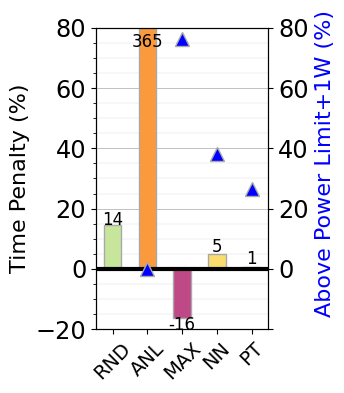

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a list of data for each category
datalist = [t_ran_per1, t_anal_per, t_maxn_per, t_nn_per, data['Error4']]

# Create a list of labels for each category
labels = ['RND', 'ANL', 'MAX', 'NN', 'PT']

fig, ax = plt.subplots(figsize=(4, 4))
colors = ['#c7e59b', '#fb9a3c', '#be4986', '#fadc6f', '#e36668']
# Calculate medians for each category
medians = [np.median(x) for x in datalist]
print(medians)
medians[1] = 80
# Plot bars from 0 to median for each category
for label, median, color in zip(labels, medians,colors):
    print(median)
    ax.bar(labels.index(label), median, color=color, width=0.5, alpha=1, edgecolor='darkgrey')
# ax.bar(1, -16, color='#4daf4a', width=0.5, alpha=0.7)
# # Add lines from 0 to median for each category
# for label, median in zip(labels, medians):
#     ax.plot([labels.index(label), labels.index(label)], [0, median], color='black', linestyle='-', linewidth=2)

# ax.set_xticks(range(len(labels)))
# ax.set_xticklabels(labels)
ax.set_xticks([0,1,2,3,4],labels, fontsize=16, rotation=45)
ax.set_ylabel('Time Penalty (%)', fontsize=16)
ax.axhline(0, color='black', linewidth=3)  # Add a bold zero line
ax.set_ylim(-20, 80)
ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='x', which='major', labelsize=14)
# Add gridlines
ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()

ax.set_axisbelow(True)

median_postions = [int(round(np.median(x))) for x in datalist]

median_postions = [54 if x > 54 else x for x in median_postions]

# median_postions[4] =

medians = [int(round(np.median(x))) for x in datalist]

for label, median_value, median_position in zip(labels, medians, median_postions):
    if label == "MAX":
        median_position = -21
    if label == "ANL":
        median_position = 73
    ax.text(labels.index(label), median_position+3, f'{median_value}', ha='center', va='center_baseline', fontsize=12, color='black')

ax2 = ax.twinx()
percentage = (100, 20.59, 55.88, 58.82)
percentage_under = (100, 23.53, 61.76, 73.53)
percentage = tuple(100 - x for x in percentage)
percentage_under = tuple(100 - x for x in percentage_under)

labels_new = ['ANL', 'MAX', 'NN', 'PT']
# Add marker using ax2 for percentage and percentage_under
# ax2.scatter((1,2,3,4), percentage, color='blue', marker='x')
ax2.plot((1,2,3,4), percentage_under, color='blue', marker='^', markeredgecolor='darkgrey', linestyle='none',markersize=10)
# ax2.set_ylabel('Above Power Limit+1W (%)', fontsize=16, color='blue')
ax2.set_ylim(-20, 80)
ax2.set_yticks([-20,0,20,40,60,80],["",0,20,40,60,80])
# ax2.legend(['A\L+1W '], loc='upper right', ncol=1, fontsize='medium')
# ax2.set_xticks([0,1,2,3,4],labels, fontsize=10, rotation=45)
ax2.tick_params(axis='x', which='major', labelsize=12)
# plt.text(-2,30,"Time Penalty (%)", fontsize=16, rotation=90, verticalalignment='center', horizontalalignment='center')
plt.text(6.1,35,"Above Power Limit+1W (%)", fontsize=16, rotation=90, verticalalignment='center', horizontalalignment='center', color='blue')

# Resnet markers
# rand_value = 61
# ax.text(labels.index('RND'), +57, f'{rand_value}', ha='center', va='center', fontsize=12)
# anal_value = -64
# ax.text(labels.index('ANL'), -57, f'{anal_value}', ha='center', va='center', fontsize=12)

# # Mobnet markers
# max_value = -68
# ax.text(labels.index('MAX'), -57, f'{max_value}', ha='center', va='center', fontsize=12)

# Add text marker for the median of each bar

# for label, median in zip(labels, medians):
#     ax.text(labels.index(label), median, f'{int(round(median))}', ha='left', va='center_baseline', fontsize=12, color='black')

plt.tight_layout()
plt.savefig('timePenalty_Mobnet_Bar.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()


[14.448533304439554, -16.248589818500406, 5.005789848557317, 0.7127315540313719]
14.448533304439554
-16.248589818500406
5.005789848557317
0.7127315540313719


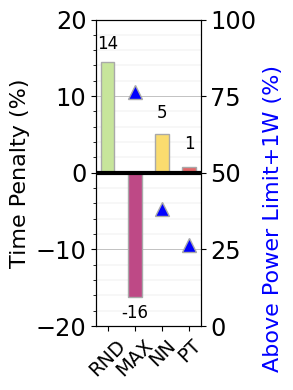

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a list of data for each category
datalist = [t_ran_per1, t_maxn_per, t_nn_per, data['Error4']]

# Create a list of labels for each category
labels = ['RND', 'MAX', 'NN', 'PT']

fig, ax = plt.subplots(figsize=(5, 4))
colors = ['#c7e59b', '#be4986', '#fadc6f', '#e36668']
# Calculate medians for each category
medians = [np.median(x) for x in datalist]
print(medians)

# Plot bars from 0 to median for each category
for label, median, color in zip(labels, medians, colors):
    print(median)
    ax.bar(labels.index(label), median, color=color, width=0.5, alpha=1, edgecolor='darkgrey')

# ax.bar(1, -16, color='#4daf4a', width=0.5, alpha=0.7)

ax.set_xticks([0, 1, 2, 3], labels, fontsize=16, rotation=45)
ax.set_ylabel('Time Penalty (%)', fontsize=16)
ax.axhline(0, color='black', linewidth=3)  # Add a bold zero line
ax.set_ylim(-20, 20)
ax.tick_params(axis='x', which='minor', bottom=False)
ax.tick_params(axis='x', which='major', labelsize=14)
# Add gridlines
ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='darkgrey', alpha=1)
ax.yaxis.grid(which='minor', linestyle='-', linewidth='0.25', color='lightgray')
ax.minorticks_on()
ax.set_axisbelow(True)

median_postions = [int(round(np.median(x))) for x in datalist]
median_postions = [54 if x > 54 else x for x in median_postions]

medians = [int(round(np.median(x))) for x in datalist]

for label, median_value, median_position in zip(labels, medians, median_postions):
    if label == "MAX":
        median_position = -21
    ax.text(labels.index(label), median_position + 3, f'{median_value}', ha='center', va='center_baseline',
            fontsize=12, color='black')

ax2 = ax.twinx()
percentage = (20.59, 55.88, 58.82)
percentage_under = (23.53, 61.76, 73.53)
percentage = tuple(100 - x for x in percentage)
percentage_under = tuple(100 - x for x in percentage_under)

labels_new = ['MAX', 'NN', 'PT']

ax2.plot((1,2,3), percentage_under, color='blue', marker='^', markeredgecolor='darkgrey', linestyle='none',
         markersize=10)

ax2.set_ylim(0, 100)
# ax2.set_yticks([-20, 0, 20, 40, 60, 80], ["", 0, 20, 40, 60, 80])
ax2.set_yticks([0, 25, 50, 75, 100])#, ["", 0, 20, 40, 60, 80])

ax2.tick_params(axis='x', which='major', labelsize=12)

plt.text(6.1, 35, "Above Power Limit+1W (%)", fontsize=16, rotation=90, verticalalignment='center',
         horizontalalignment='center', color='blue')

plt.tight_layout()
plt.savefig('timePenalty_Mobnet_Bar.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()
